In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

In [145]:
def load_csv(path: str) -> pd.DataFrame:
    """pandas를 이용하여 path의 데이터를 DataFrame의 형태로 반환합니다."""
    df = pd.read_csv(path)
    return df

# 데이터 경로
data_path_1 = "./open/train.csv"
data_path_2 = "./open/test.csv"
# 데이터 불러오기
IC_train = load_csv(data_path_1)
IC_test = load_csv(data_path_2)

In [146]:
#train에 대한 행/열 사이즈와 모습 확인
print(IC_train.shape)
IC_train.head(5)

(769, 1026)


ID     label    0    1    2    3    4    5    6    7  ...  1014  \
0  TRAIN_000  building  251  196   51   63   68   78  189   34  ...    85   
1  TRAIN_001  building  247  184  203  237  255  255  193  255  ...   242   
2  TRAIN_002  building  217  223  232  231  239  212  109  115  ...    96   
3  TRAIN_003       cat  133  149  153  138   68  157  159  166  ...   245   
4  TRAIN_004  building  240  213  187  159  112  134  239  233  ...   148   

   1015  1016  1017  1018  1019  1020  1021  1022  1023  
0   195    63    30    73    65    63   201   251   248  
1   239   241   242   242   241   241   241   240   238  
2    90   103   166   191   163   190   190   206   231  
3   241   247   255   250   190   186   244   254   201  
4    59   163   133    92   196   221   194   182   251  

[5 rows x 1026 columns]

In [147]:
#test에 대한 행/열 사이즈와 모습 확인
print(IC_test.shape)
IC_test.head(5)

(250, 1025)


ID    0    1    2    3    4    5    6    7    8  ...  1014  1015  \
0  TEST_000  186  189  189  190  190  190  192  191  192  ...   200   200   
1  TEST_001  209  219  227  227  220  218  225  225  225  ...    61   103   
2  TEST_002   52  232  249  209  117   63   50   70   23  ...   115   112   
3  TEST_003  239  230  204  222  194  198  228  235  198  ...   202   170   
4  TEST_004  247  247  248  247  246  246  245  246  245  ...   148   133   

   1016  1017  1018  1019  1020  1021  1022  1023  
0   199   197   197   194   193   191   192   193  
1   134   143   236   220   219   219   219   214  
2   148   173    50    20   212   251   246   249  
3   165   178   145   175   234   197   226   238  
4   212   243   230   232   233   234   234   234  

[5 rows x 1025 columns]

In [148]:
IC_train.keys()

Index(['ID', 'label', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022',
       '1023'],
      dtype='object', length=1026)

In [149]:
#계산하기 전에 ID,label 컬럼을 제외
IC_train_filtered = IC_train.iloc[:, 2:]
IC_train_filtered.head(5)

0    1    2    3    4    5    6    7    8    9  ...  1014  1015  1016  \
0  251  196   51   63   68   78  189   34   62   61  ...    85   195    63   
1  247  184  203  237  255  255  193  255  255  255  ...   242   239   241   
2  217  223  232  231  239  212  109  115  155  164  ...    96    90   103   
3  133  149  153  138   68  157  159  166  170  167  ...   245   241   247   
4  240  213  187  159  112  134  239  233  232  235  ...   148    59   163   

   1017  1018  1019  1020  1021  1022  1023  
0    30    73    65    63   201   251   248  
1   242   242   241   241   241   240   238  
2   166   191   163   190   190   206   231  
3   255   250   190   186   244   254   201  
4   133    92   196   221   194   182   251  

[5 rows x 1024 columns]

In [150]:
#계산하기 전에 ID 컬럼을 제외
IC_test_filtered = IC_test.iloc[:,1:]
IC_test_filtered.head(5)

0    1    2    3    4    5    6    7    8    9  ...  1014  1015  1016  \
0  186  189  189  190  190  190  192  191  192  192  ...   200   200   199   
1  209  219  227  227  220  218  225  225  225  210  ...    61   103   134   
2   52  232  249  209  117   63   50   70   23    6  ...   115   112   148   
3  239  230  204  222  194  198  228  235  198  147  ...   202   170   165   
4  247  247  248  247  246  246  245  246  245  245  ...   148   133   212   

   1017  1018  1019  1020  1021  1022  1023  
0   197   197   194   193   191   192   193  
1   143   236   220   219   219   219   214  
2   173    50    20   212   251   246   249  
3   178   145   175   234   197   226   238  
4   243   230   232   233   234   234   234  

[5 rows x 1024 columns]

In [151]:
#train 데이터와 test 데이터에 있는 데이터를 예측 연산을 위해 분리 저장
X_train, y_train = IC_train_filtered , IC_train.label
X_test = IC_test_filtered
#y값 label 확인인
print(y_train.shape)
y_train.head(5)

(769,)


0    building
1    building
2    building
3         cat
4    building
Name: label, dtype: object

In [152]:
#X.iloc[0]
X_train.to_numpy()[0]

array([251, 196,  51, ..., 201, 251, 248], dtype=int64)

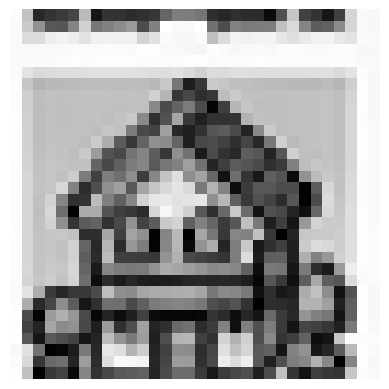

In [153]:
# 32x32 모양의 2차원 어레리로 변환 후 이미지 그리기
def plot_digit(image_data):
    image = image_data.reshape(32, 32)
    plt.imshow(image, cmap="gray")
    plt.axis("off")

# 첫째 이미지 그리기
some_digit = X_train.to_numpy()[0]
plot_digit(some_digit)
plt.show()

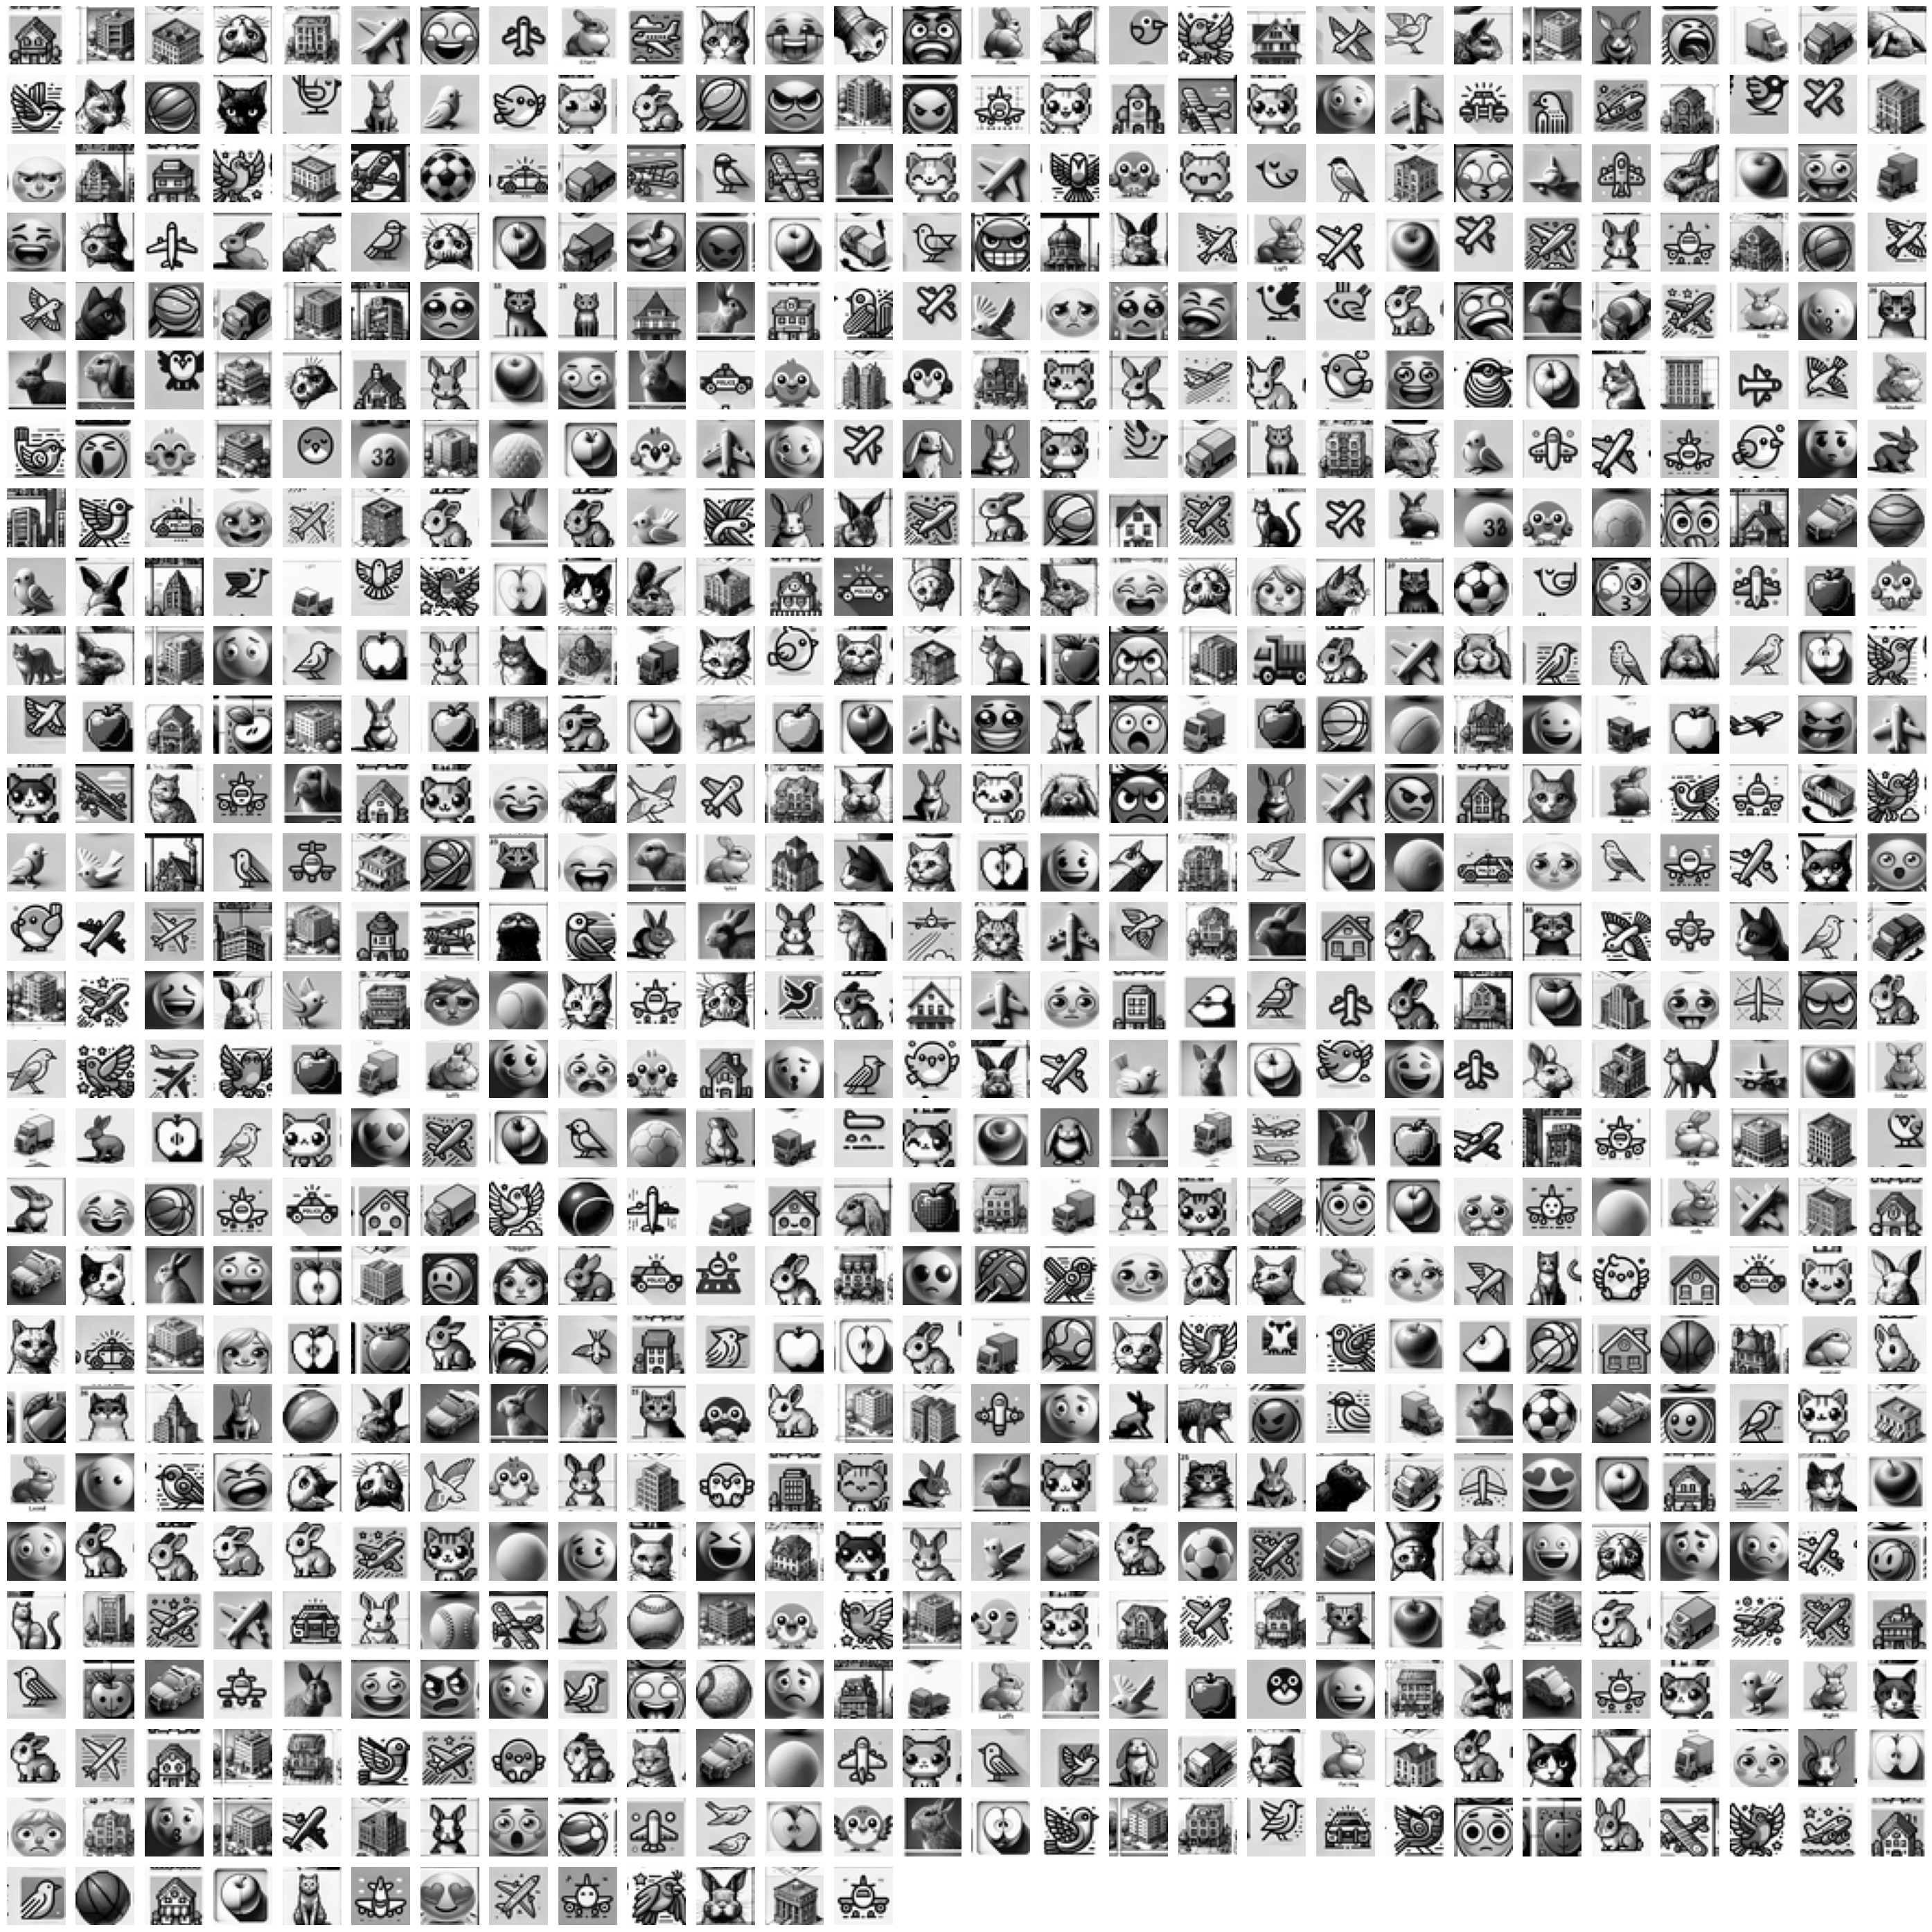

In [154]:
def plot_digits(images, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
    axes = axes.flatten()  # 2D 배열을 1D로 변환

    for i in range(n_rows * n_cols):  # 총 n_rows * n_cols 개의 이미지 출력
        if i < len(images):
            image = images[i].reshape(32, 32)  # 32x32로 변환
            axes[i].imshow(image, cmap="gray")
        axes[i].axis("off")  # 축 제거

    plt.tight_layout()
    plt.show()

# X 데이터를 넘파이 배열로 변환
X_array = X_train.to_numpy()

# 전체 이미지 출력
plot_digits(X_array, n_rows=28, n_cols=28)

In [155]:
# 데이터 정규화 (SGDClassifier는 정규화된 데이터에서 성능이 좋음)
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [156]:
X_train.head(5)

0         1         2         3         4         5         6     \
0  0.802509 -0.076718 -2.363154 -2.141776 -1.956371 -1.810431  0.003913   
1  0.733083 -0.276087  0.068719  0.636505  0.941480  0.961390  0.064094   
2  0.212386  0.371860  0.532695  0.540702  0.693535  0.288010 -1.199705   
3 -1.245564 -0.857577 -0.731239 -0.944241 -1.956371 -0.573291 -0.447444   
4  0.611587  0.205720 -0.187267 -0.608931 -1.274524 -0.933471  0.756174   

       7         8         9     ...      1014      1015      1016      1017  \
0 -2.154486 -1.743017 -1.707985  ... -0.904385  0.420131 -1.338098 -1.782217   
1  0.987728  1.010739  1.017665  ...  1.072426  0.986759  0.992587  0.988870   
2 -1.002815 -0.416078 -0.260861  ... -0.765883 -0.932049 -0.814348 -0.004538   
3 -0.277689 -0.202055 -0.218712  ...  1.110199  1.012515  1.071149  1.158795   
4  0.674928  0.682571  0.736671  ... -0.111143 -1.331264 -0.028724 -0.435887   

       1018      1019      1020      1021      1022      1023  
0 -1.234756 -1.420272 -1.638764  0.184578  0.867303  0.850588  
1  0.963074  0.907784  0.851879  0.762100  0.703816  0.697839  
2  0.299823 -0.123968  0.138268  0.025759  0.198489  0.590914  
3  1.067113  0.233177  0.082298  0.805414  0.911891  0.132667  
4 -0.987663  0.312543  0.572032  0.083512 -0.158212  0.896413  

[5 rows x 1024 columns]

In [157]:
X_test.head(5)

0         1         2         3         4         5         6     \
0 -0.325667 -0.193016 -0.155269 -0.113950 -0.065795 -0.056510  0.049049   
1  0.073534  0.305404  0.452699  0.476834  0.399101  0.381970  0.545541   
2 -2.651445  0.521387  0.804681  0.189425 -1.197041 -2.045331 -2.087374   
3  0.594231  0.488158  0.084719  0.396998 -0.003809  0.068770  0.590677   
4  0.733083  0.770597  0.788682  0.796177  0.802011  0.820450  0.846446   

       7         8         9     ...      1014      1015      1016      1017  \
0  0.077765  0.111845  0.132532  ...  0.543597  0.484521  0.442650  0.400668   
1  0.561183  0.582694  0.385427  ... -1.206573 -0.764636 -0.408443 -0.305175   
2 -1.642632 -2.299476 -2.480720  ... -0.526651 -0.648735 -0.225130  0.086960   
3  0.703365  0.197454 -0.499707  ...  0.568779  0.098184 -0.002537  0.152316   
4  0.859764  0.868057  0.877168  ... -0.111143 -0.378299  0.612868  1.001941   

       1018      1019      1020      1021      1022      1023  
0  0.377853  0.286088  0.180245  0.040197 -0.009586  0.010468  
1  0.885044  0.630005  0.544047  0.444463  0.391702  0.331241  
2 -1.533869 -2.015513  0.446100  0.906480  0.792991  0.865863  
3 -0.298403  0.034763  0.753932  0.126826  0.495740  0.697839  
4  0.807015  0.788736  0.739940  0.661033  0.614640  0.636739  

[5 rows x 1024 columns]

In [161]:
#SGD 경사하강법 모델 학습
#sgd_clf = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42) #SVM하고 유사한 경계 학습
#sgd_clf = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3, random_state=42) #로지스틱 회귀 학습
#sgd_clf.fit(X_train, y_train)

#서포트 벡터 모델 학습
svm_clf = SVC(kernel="rbf", random_state=42)
svm_clf.fit(X_train, y_train)

SVC(random_state=42)

In [164]:
#모델 예측
#y_pred = sgd_clf.predict(X_test) #SGD 경사하강법 
y_pred = svm_clf.predict(X_test) #서포트 벡터

# 학습된 가중치 확인
#print("학습된 가중치 (weights):", sgd_clf.coef_)
#print("학습된 절편 (bias):", sgd_clf.intercept_)

print('학습평가(svm_clf) : ',svm_clf.score(X_train, y_train))

학습평가(svm_clf) :  0.9843953185955787


In [165]:
IC_submission = pd.DataFrame({"ID": IC_test["ID"], "label": y_pred})
IC_submission.to_csv("submission.csv", index=False)